Julia Palomari  RM: 551910

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns

In [11]:
dados = pd.read_csv("236b046d-022e-4613-a3b4-99ad429b68fc_Data.csv")

In [12]:
dados

,Series Name,Series Code,Country Name,Country Code,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Ratio of female to male labor force participat...,SL.TLF.CACT.FM.ZS,Afghanistan,AFG,23.7490645063876,25.3757325289357,27.1029295008949,28.93696493811,27.8325779792055,26.5817299358641,24.6862301129122,21.8409819358079,7.34537368323521,6.98535794895538
1,Ratio of female to male labor force participat...,SL.TLF.CACT.FM.ZS,Albania,ALB,69.4344525963839,73.3286516853933,76.6610694313928,74.5193174307517,76.1195137517997,77.8305014810121,77.4244906791974,78.7746037540689,78.0343581803436,78.0831029844348
2,Ratio of female to male labor force participat...,SL.TLF.CACT.FM.ZS,Algeria,DZA,22.5044102439321,24.3894717800289,25.479655344731,25.2633331315455,25.0453720508167,24.8565041387227,24.6660915132924,25.4346927747227,24.5996387718242,25.09815044261
3,Ratio of female to male labor force participat...,SL.TLF.CACT.FM.ZS,American Samoa,ASM,..,..,..,..,..,..,..,..,..,..
4,Ratio of female to male labor force participat...,SL.TLF.CACT.FM.ZS,Andorra,AND,..,..,..,..,..,..,..,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,Data from database: Gender Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#LINHA

Nesse gráfico é analisado o rácio entre taxa de participação feminina e masculina na força de trabalho (%) (estimativa modelada da OIT), no Brasil entre 2014 a 2023


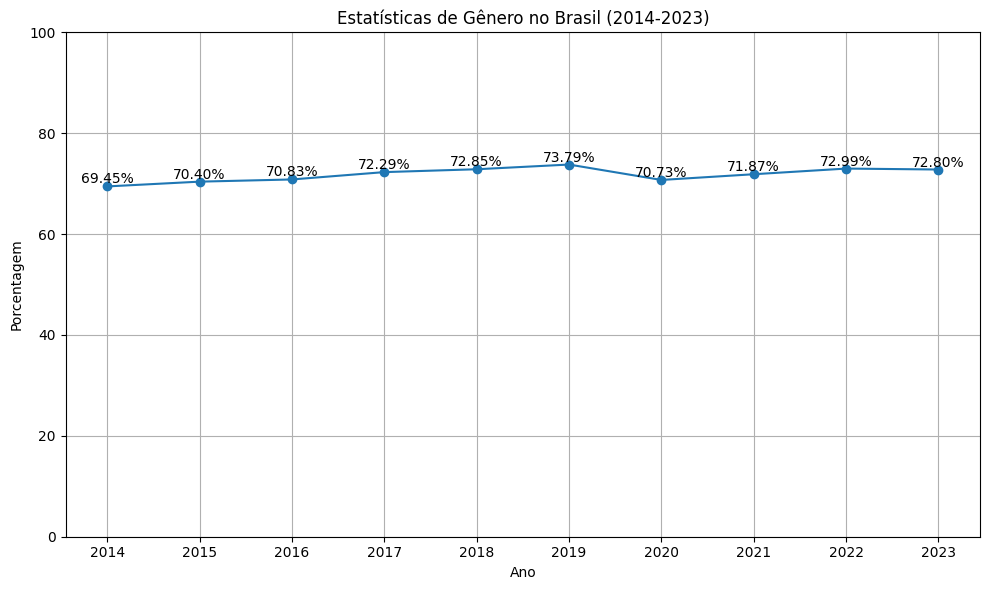

In [78]:
# Selecionando o Brasil
dados_brasil = dados[dados['Country Name'] == 'Brazil']

if dados_brasil.empty:
    raise ValueError('Não existem dados para o Brasil no arquivo CSV.')

# Chamando as colunas (2014 a 2023)
colunas_interesse = ["2014 [YR2014]", "2015 [YR2015]", "2016 [YR2016]",
                     "2017 [YR2017]", "2018 [YR2018]", "2019 [YR2019]",
                     "2020 [YR2020]", "2021 [YR2021]", "2022 [YR2022]", "2023 [YR2023]"]

missing_columns = [col for col in colunas_interesse if col not in dados.columns]
if missing_columns:
    raise ValueError(f"As colunas seguintes estão faltando no arquivo CSV: {missing_columns}")

dados_brasil = dados_brasil[colunas_interesse].T

dados_brasil.columns = ['Porcentagem']
dados_brasil.index = [ano.split(' ')[0] for ano in colunas_interesse]

# Convertendo os valores para numeros forçando erros a NaN
dados_brasil['Porcentagem'] = pd.to_numeric(dados_brasil['Porcentagem'], errors='coerce')

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(dados_brasil.index, dados_brasil['Porcentagem'], marker='o', linestyle='-')

plt.xlabel('Ano')
plt.ylabel('Porcentagem')
plt.title('Estatísticas de Gênero no Brasil (2014-2023)')
plt.ylim(0, 100)
plt.grid(True)

# Add a % nos pontos
for i, (ano, porcentagem) in enumerate(dados_brasil['Porcentagem'].items()):
    plt.annotate(f'{porcentagem:.2f}%', xy=(i, porcentagem), ha='center', va='bottom')

plt.tight_layout()
plt.show()

#BARRA

Esse grafico exibe o rácio entre taxa de participação feminina e masculina na força de trabalho (%) (estimativa modelada da OIT), em 20 países aleatorios pós pandemia


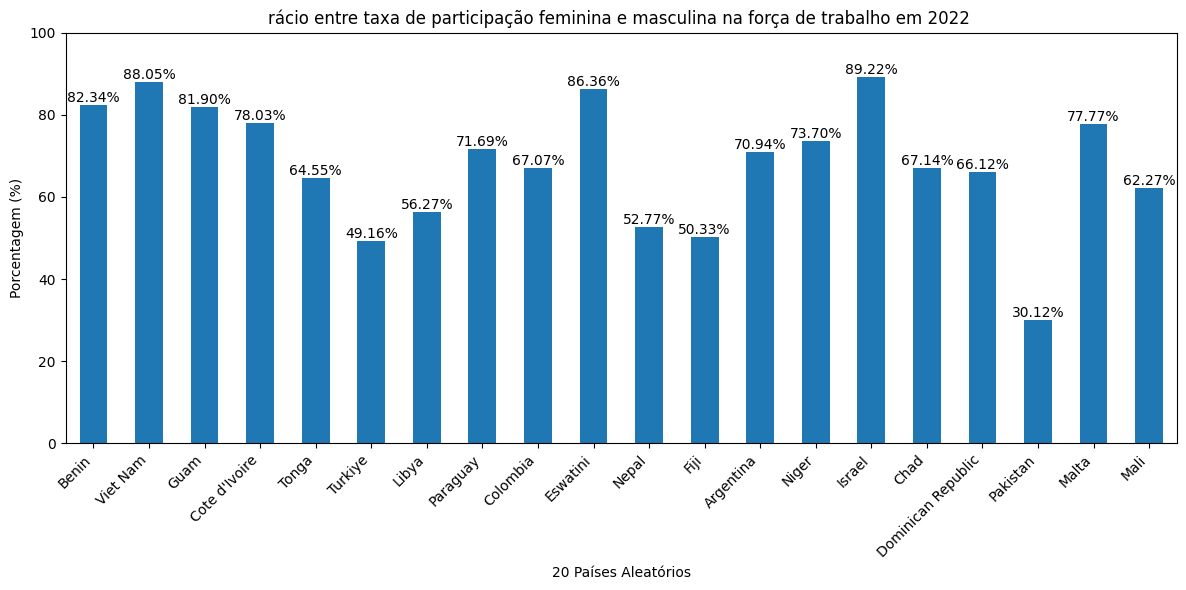

In [80]:
# Configurando a coluna "2022 [YR2022]"
if "2022 [YR2022]" not in dados.columns:
    raise ValueError('A coluna "2022 [YR2022]" não existe no arquivo CSV.')

dados_filtrados = dados.dropna(subset=["2022 [YR2022]"]).copy()

dados_filtrados.loc[:, "2022 [YR2022]"] = pd.to_numeric(dados_filtrados["2022 [YR2022]"], errors='coerce')
dados_filtrados = dados_filtrados.dropna(subset=["2022 [YR2022]"])

# Selecionando 20 países aleatórios
selected_countries = dados_filtrados.sample(n=20, random_state=1)

# Gráfico
plt.figure(figsize=(12, 6))
bars = selected_countries.set_index('Country Name')["2022 [YR2022]"].plot(kind='bar')

plt.xlabel('20 Países Aleatórios')
plt.ylabel('Porcentagem (%)')
plt.title('rácio entre taxa de participação feminina e masculina na força de trabalho em 2022 ')
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right')

# Adicionar as anotações de porcentagem acima das barras
for i, (country, percent) in enumerate(selected_countries.set_index('Country Name')["2022 [YR2022]"].items()):
    plt.annotate(f'{percent:.2f}%', xy=(i, percent), ha='center', va='bottom')

plt.tight_layout()
plt.show()

#HISTOGRAMA

Esse grafico faz um comparativo sobre o rácio entre taxa de participação feminina e masculina na força de trabalho (%) (estimativa modelada da OIT), entre o Brasil e +5 países aleatorios quando ainda existia diversos resquícios da pandemia em 2021


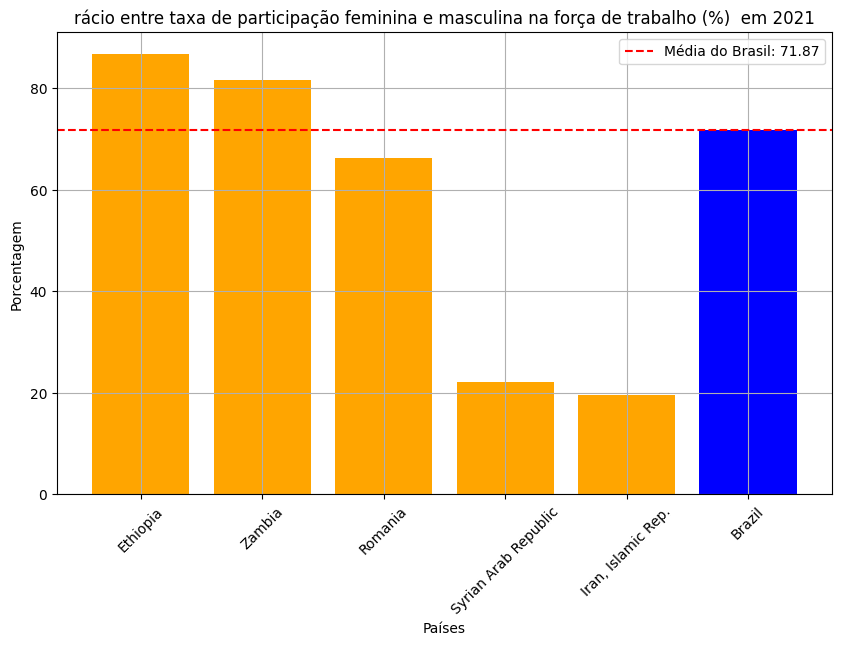

In [83]:
# Configurando a coluna escolhida
dados['2021 [YR2021]'] = pd.to_numeric(dados['2021 [YR2021]'], errors='coerce')

dados = dados.dropna(subset=['2021 [YR2021]'])

# Selecionando o BR
brazil_mean_2021 = dados.loc[dados['Country Name'] == 'Brazil', '2021 [YR2021]'].mean()

# Selecionando aleatoriamente +5 países
random_countries = dados['Country Name'].sample(n=5, random_state=42).unique()

random_countries_mean_2021 = dados[dados['Country Name'].isin(random_countries)].groupby('Country Name')['2021 [YR2021]'].mean().reset_index()

random_countries_mean_2021 = random_countries_mean_2021.sort_values(by='2021 [YR2021]', ascending=False)

# Gráfico
plt.figure(figsize=(10, 6))

plt.bar(random_countries_mean_2021['Country Name'], random_countries_mean_2021['2021 [YR2021]'], color='orange')

plt.bar('Brazil', brazil_mean_2021, color='blue')

plt.axhline(y=brazil_mean_2021, color='red', linestyle='--', label=f'Média do Brasil: {brazil_mean_2021:.2f}')

# Título e rótulos
plt.title('rácio entre taxa de participação feminina e masculina na força de trabalho (%)  em 2021')
plt.xlabel('Países')
plt.ylabel('Porcentagem')

plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

#PIZZA

O gráfico pizza esta exibindo um comparativo entre 3 países sortidos, a media do rácio entre taxa de participação feminina e masculina na força de trabalho (%) (estimativa modelada da OIT), durante a pandemia


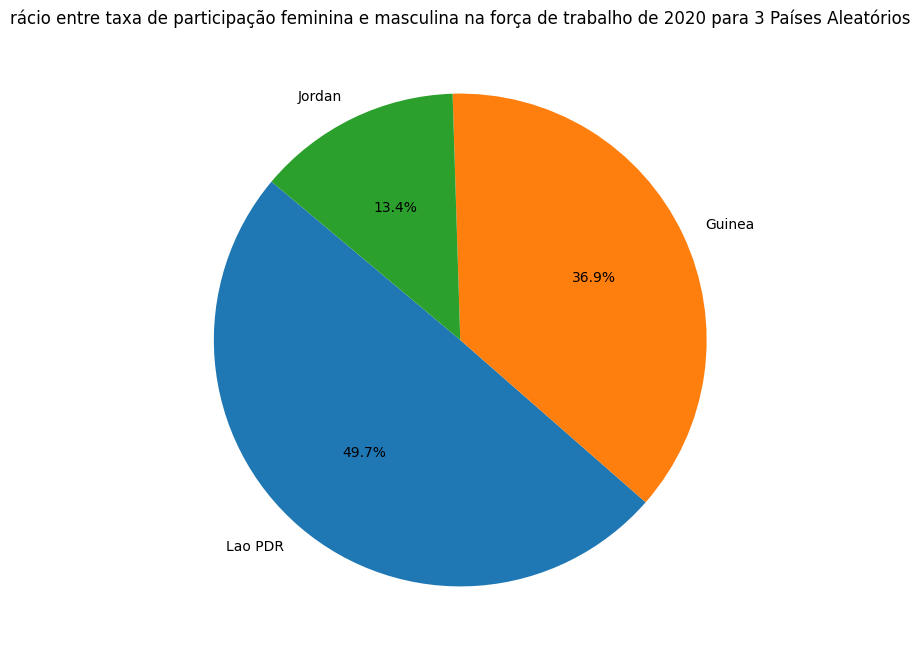

In [82]:
# Sorteando 3 países aleatórios
paises_aleatorios = dados['Country Name'].sample(n=3)

# Coluna
dados_2020 = dados.set_index('Country Name').loc[paises_aleatorios, '2020 [YR2020]']

# Gráfico
plt.figure(figsize=(8, 8))
plt.pie(dados_2020, labels=dados_2020.index, autopct='%1.1f%%', startangle=140)
plt.title('rácio entre taxa de participação feminina e masculina na força de trabalho de 2020 para 3 Países Aleatórios')
plt.show()

#SCATTER

Esse grafico exibe o rácio entre taxa de participação feminina e masculina na força de trabalho (%) (estimativa modelada da OIT), em 20 países aleatorios antes pandemia

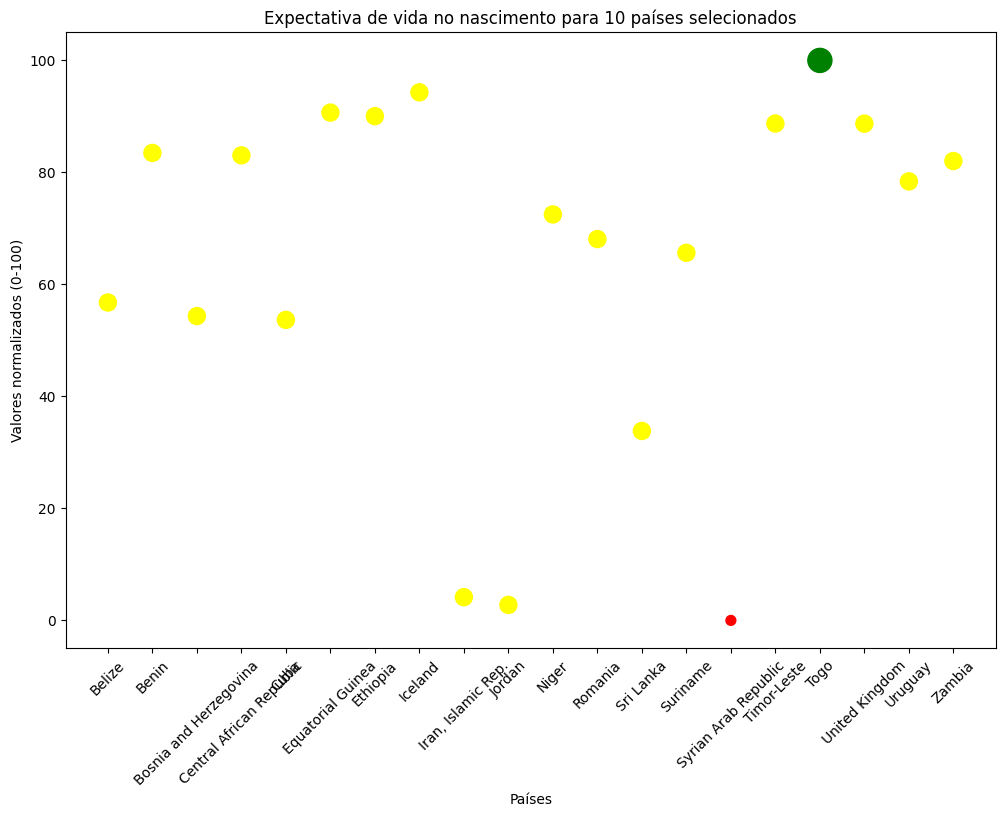

In [84]:
# Verificando se há pelo menos 10 países no arquivo CSV
if dados['Country Name'].nunique() < 10:
    print("Não há países suficientes no arquivo CSV para selecionar 10.")
else:
    # Selecionando aleatoriamente 10 países
    sampled_countries = dados['Country Name'].sample(n=20, random_state=42).unique()

    filtered_dados = dados[dados['Country Name'].isin(sampled_countries)].copy()

    # Convertendo os valores para numéricos
    filtered_dados.loc[:, '2018 [YR2018]'] = pd.to_numeric(filtered_dados['2018 [YR2018]'], errors='coerce')

    # Removendo linhas com valores não numéricos
    filtered_dados = filtered_dados.dropna(subset=['2018 [YR2018]'])

    # Calculando a média de cada país
    country_means = filtered_dados.groupby('Country Name')['2018 [YR2018]'].mean()
    min_mean = country_means.min()
    max_mean = country_means.max()

    def normalize_value(value):
        return ((value - min_mean) / (max_mean - min_mean)) * 100

    filtered_dados.loc[:, 'normalized_value'] = filtered_dados['2018 [YR2018]'].apply(normalize_value)

    # Definindo as cores e tamanhos de acordo com os valores normalizados
    def get_color(value):
        if value == 0:
            return 'red'
        elif value == 100:
            return 'green'
        else:
            return 'yellow'

    def get_size(value):
        if value == 0:
            return 50   # Tamanho pequeno
        elif value == 100:
            return 300  # Tamanho grande
        else:
            return 150  # Tamanho intermediário

    filtered_dados.loc[:, 'color'] = filtered_dados['normalized_value'].apply(get_color)
    filtered_dados.loc[:, 'size'] = filtered_dados['normalized_value'].apply(get_size)

    plt.figure(figsize=(12, 8))  # Tamanho da imagem
    plt.scatter(filtered_dados['Country Name'], filtered_dados['normalized_value'],
                c=filtered_dados['color'], s=filtered_dados['size'])

    # Título e rótulos
    plt.title('Expectativa de vida no nascimento para 10 países selecionados')
    plt.xlabel('Países')
    plt.ylabel('Valores normalizados (0-100)')

    # Deixa os nomes em 45°
    plt.xticks(rotation=45)

    plt.show()